In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Laden der Daten!
df = pd.read_csv('Marktkampagne.csv')

# Anzeigen der ersten Zeilen
df.head()


,ID,Geburtsjahr,Bildunsniveau,Familienstand,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Datum_Kunde,Letzter_Kauf_Tage,Ausgaben_Wein,...,Anzahl_WebBesuche_Monat,Kampagne_3_Akzeptiert,Kampagne_4_Akzeptiert,Kampagne_5_Akzeptiert,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Beschwerde,Z_Kontaktkostenfaktor,Z_Umsatzfaktor,Antwort_Letzte_Kampagne
0,5524,1967,Hochschulabschluss,Ledig,58138.0,0,0,04-09-2022,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1964,Hochschulabschluss,Ledig,46344.0,1,1,08-03-2024,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1975,Hochschulabschluss,Zusammenlebend,71613.0,0,0,21-08-2023,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1994,Hochschulabschluss,Zusammenlebend,26646.0,1,0,10-02-2024,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1991,Doktor,Verheiratet,58293.0,1,0,19-01-2024,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
encoder = LabelEncoder()
df['Bildunsniveau'] = encoder.fit_transform(df['Bildunsniveau'])
df['Familienstand'] = encoder.fit_transform(df['Familienstand'])


In [4]:
df['Alter'] = 2024 - df['Geburtsjahr']


In [5]:
ausgaben_spalten = ['Ausgaben_Wein', 'Ausgaben_Obst', 'Ausgaben_Fleisch', 'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten', 'Ausgaben_Gold']
df['Gesamtausgaben'] = df[ausgaben_spalten].sum(axis=1)
df.drop(columns=ausgaben_spalten, inplace=True)


In [6]:
missing_values = df.isnull().sum()
missing_values


ID                          0
Geburtsjahr                 0
Bildunsniveau               0
Familienstand               0
Einkommen                  24
Kinder_zu_Hause             0
Teenager_zu_Hause           0
Datum_Kunde                 0
Letzter_Kauf_Tage           0
Anzahl_Rabattkäufe          0
Anzahl_Webkäufe             0
Anzahl_Katalogkäufe         0
Anzahl_Ladeneinkäufe        0
Anzahl_WebBesuche_Monat     0
Kampagne_3_Akzeptiert       0
Kampagne_4_Akzeptiert       0
Kampagne_5_Akzeptiert       0
Kampagne_1_Akzeptiert       0
Kampagne_2_Akzeptiert       0
Beschwerde                  0
Z_Kontaktkostenfaktor       0
Z_Umsatzfaktor              0
Antwort_Letzte_Kampagne     0
Alter                       0
Gesamtausgaben              0
dtype: int64

In [7]:
median_income = df['Einkommen'].median()
df['Einkommen'].fillna(median_income, inplace=True)


C:\Users\angel\AppData\Local\Temp\ipykernel_8776\1259655380.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Einkommen'].fillna(median_income, inplace=True)


In [8]:
df['Datum_Kunde'] = pd.to_datetime(df['Datum_Kunde'], errors='coerce')


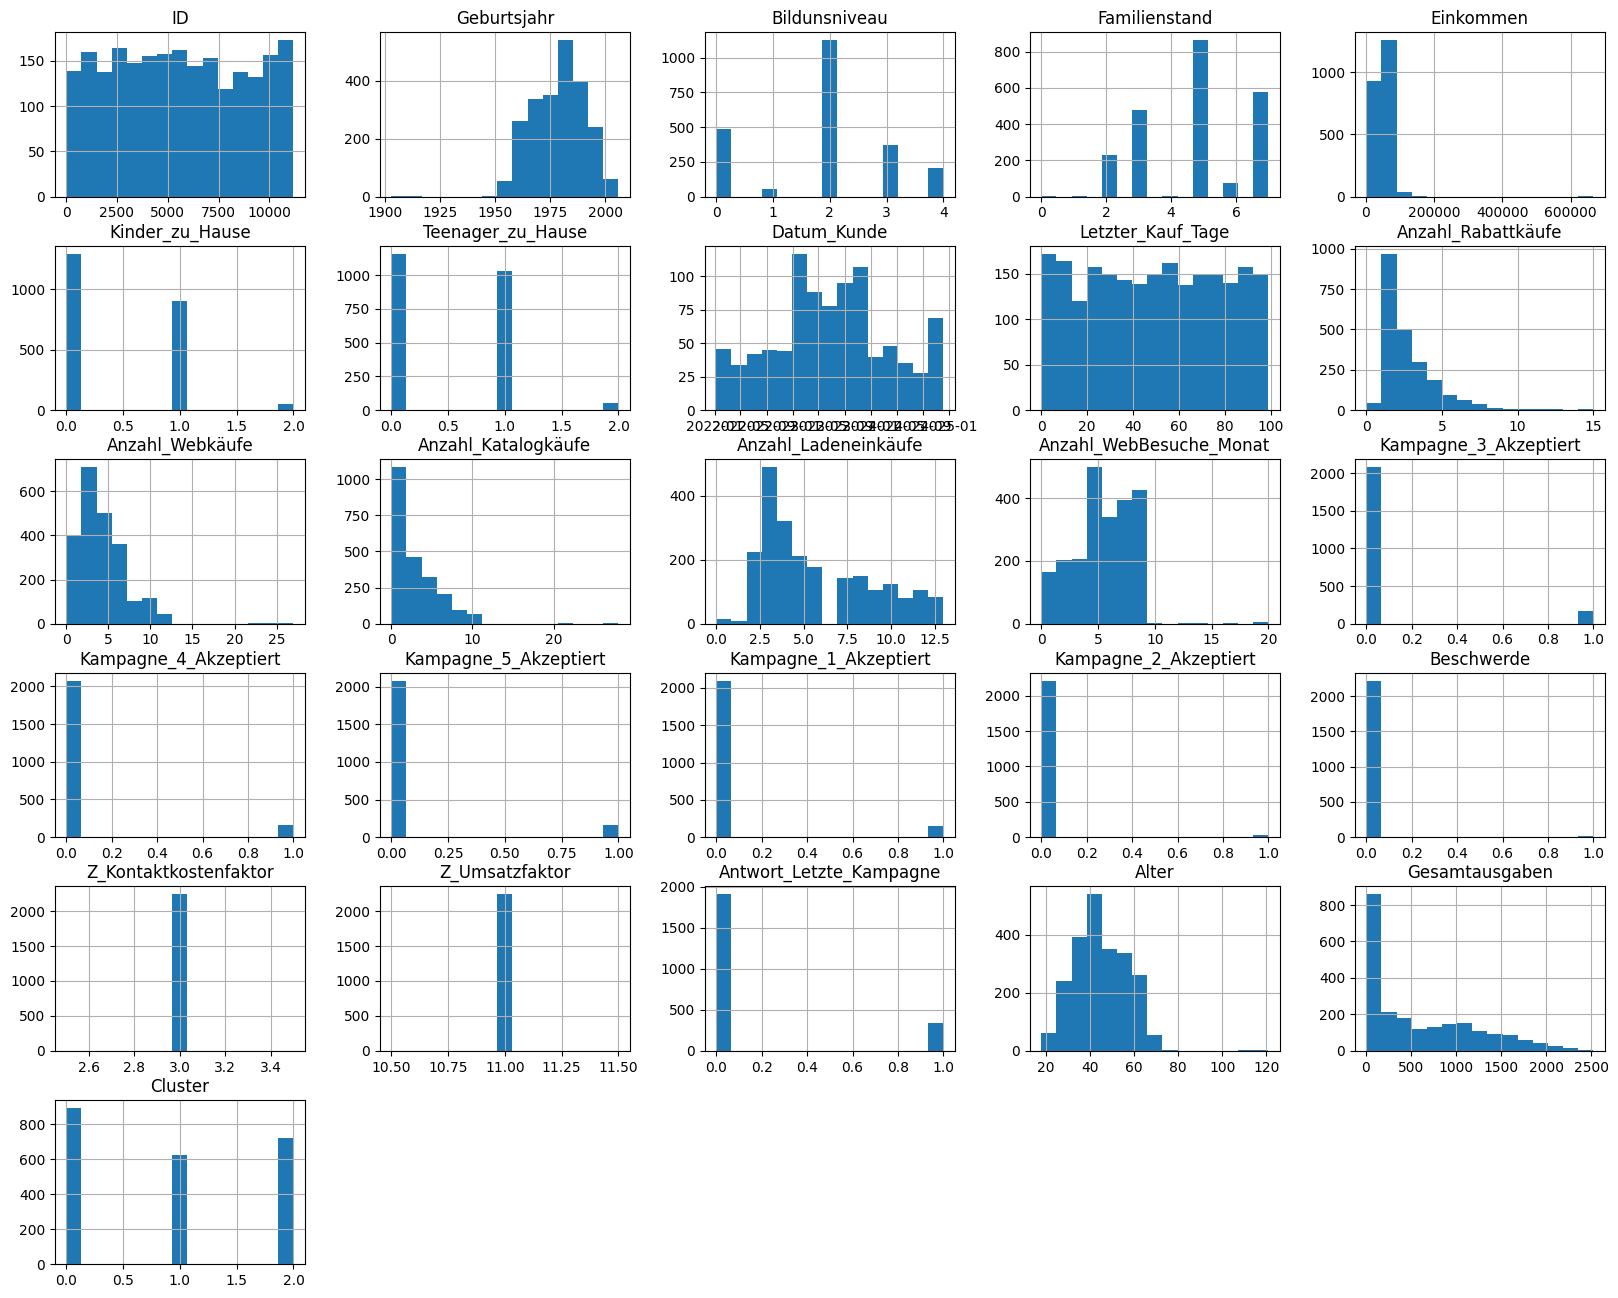

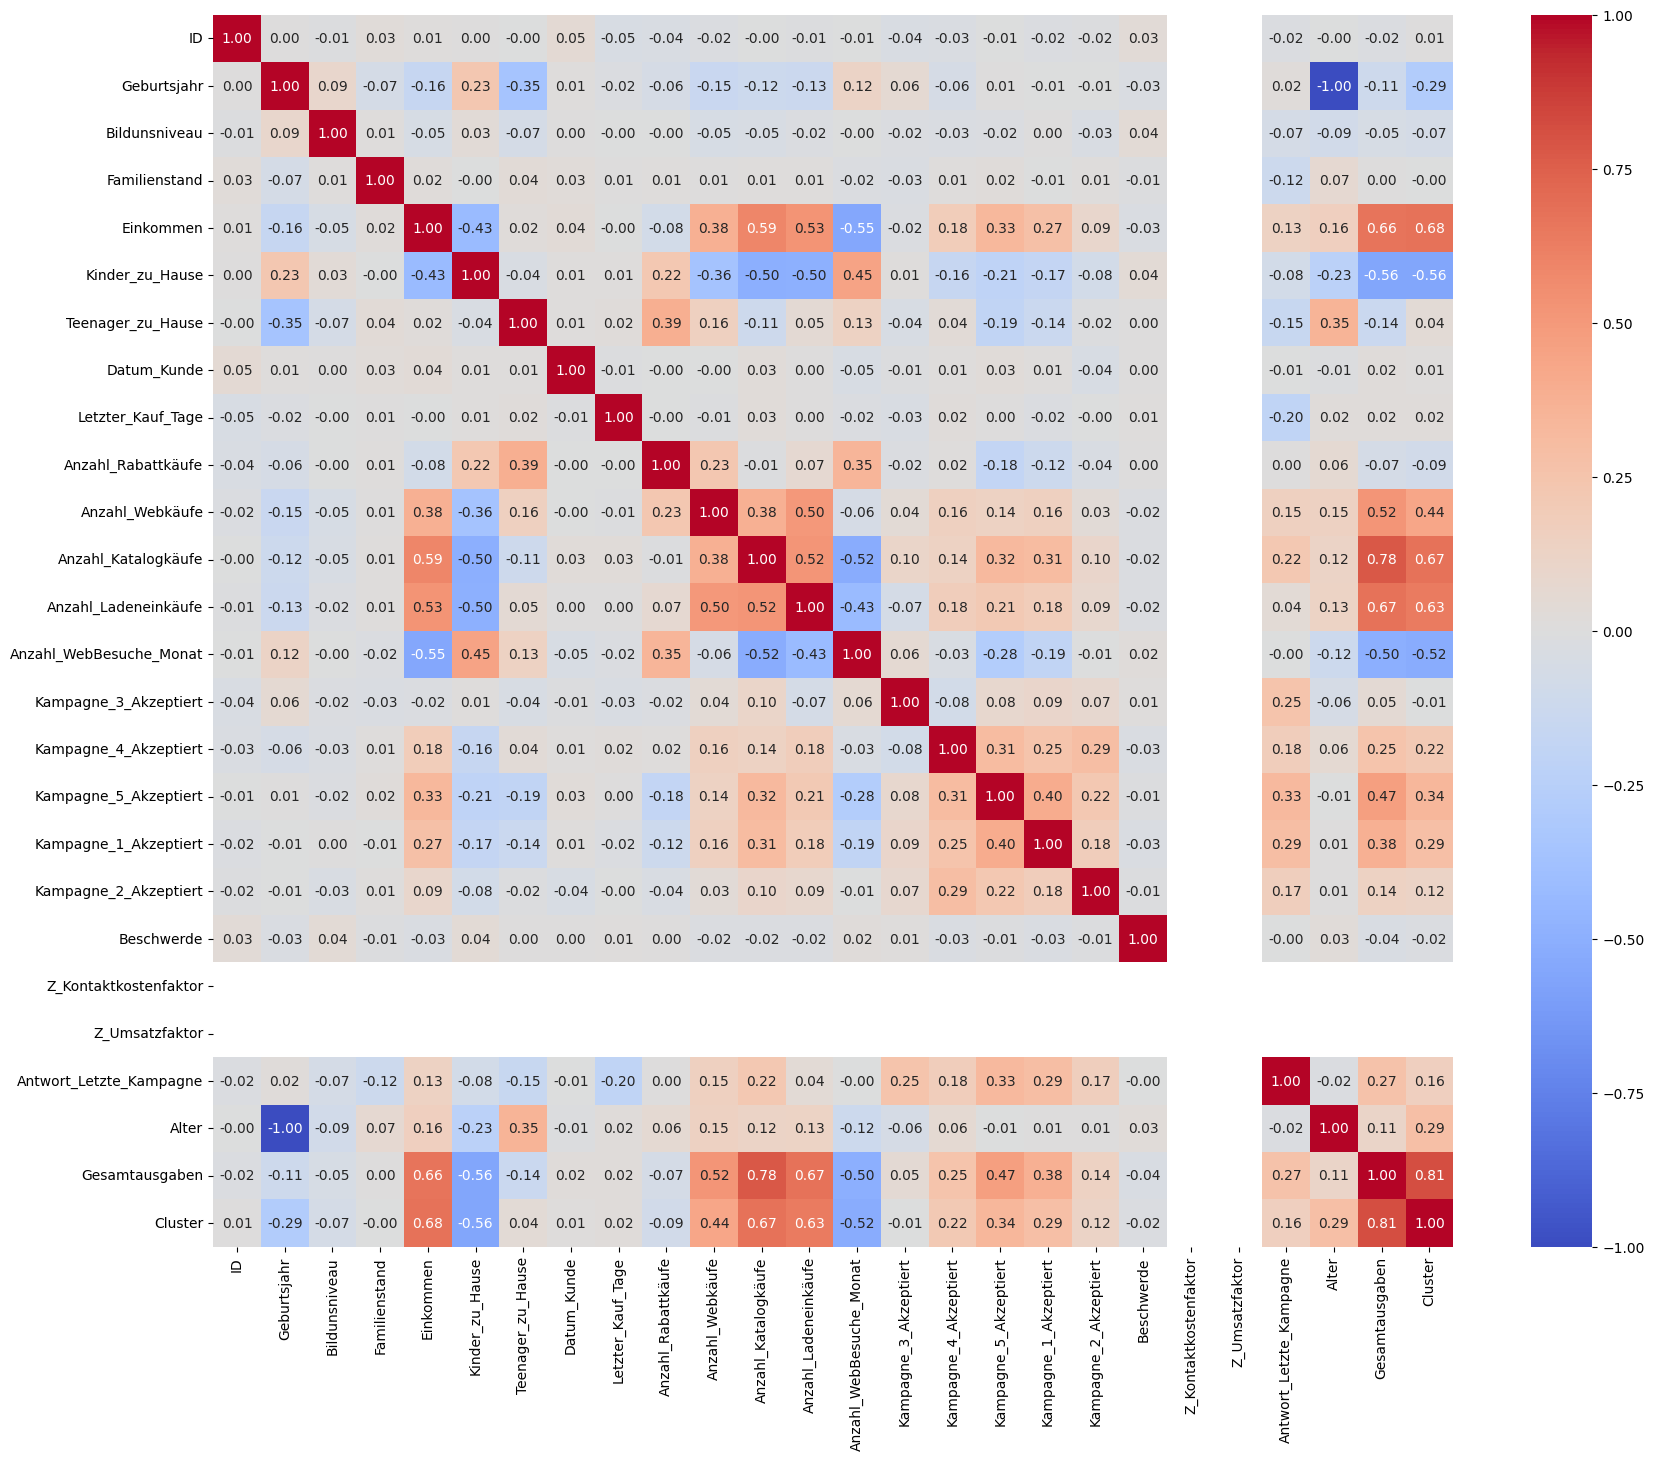

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramme für numerische Merkmale
df.hist(bins=15, figsize=(20, 16))
plt.show()

# Korrelationsmatrix
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Spalten mit nicht-numerischen Daten entfernen
X = df.drop(columns=['Gesamtausgaben', 'Datum_Kunde'])
y = df['Gesamtausgaben']

# Aufteilung in Trainings- und Testdatensatz erneut durchführen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalierung der numerischen Daten
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Modelltraining
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Vorhersagen auf dem Testdatensatz
y_pred = model.predict(X_test_scaled)

# Bewertung des Modells
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Berechnung des R^2-Wertes
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


Mean Squared Error: 85298.21519735215
R^2 Score: 0.760104661735703


In [12]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest Modell
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print(f"Random Forest R^2 Score: {r2_score(y_test, y_pred_rf)}")

# Gradient Boosting Modell
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
print(f"Gradient Boosting R^2 Score: {r2_score(y_test, y_pred_gb)}")



Random Forest R^2 Score: 0.8758060537409159
Gradient Boosting R^2 Score: 0.8665724171888389


In [13]:
from sklearn.model_selection import GridSearchCV

# Parameter Grid für Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search durchführen
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Beste Parameter anzeigen
print(f"Beste Parameter: {grid_search.best_params_}")
print(f"Bester R^2 Score: {grid_search.best_score_}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Beste Parameter: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Bester R^2 Score: 0.870725524184418


Random Forest R^2 Score: 0.8758060537409159


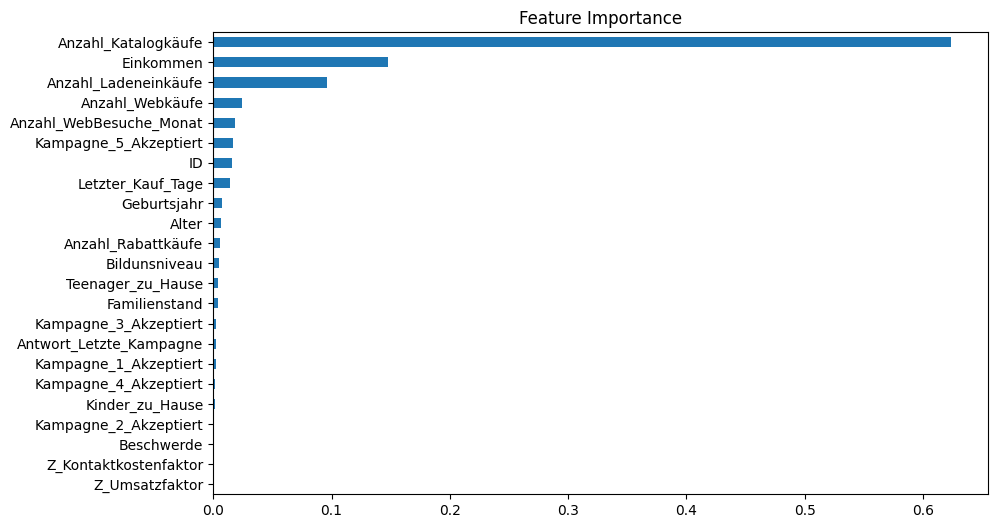

In [14]:
# Überprüfung des R^2-Wertes und der Feature Importance für das Random Forest Modell
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print(f"Random Forest R^2 Score: {r2_score(y_test, y_pred_rf)}")

importance = pd.Series(rf_model.feature_importances_, index=X.columns)
importance_sorted = importance.sort_values()
importance_sorted.plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()


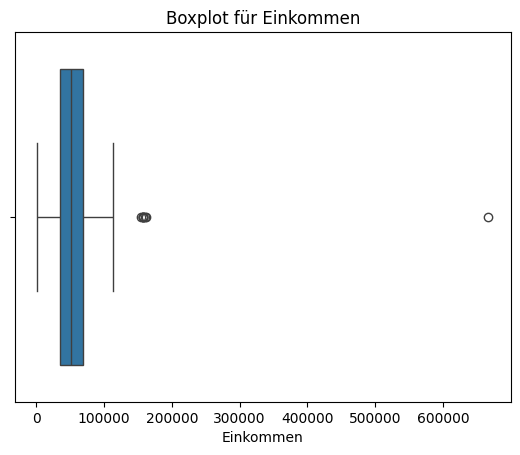

In [15]:
import seaborn as sns

# Boxplot für Einkommen, um Ausreißer zu visualisieren
sns.boxplot(x=df['Einkommen'])
plt.title('Boxplot für Einkommen')
plt.show()


C:\Users\angel\AppData\Local\Temp\ipykernel_8776\2256005305.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Datum_Kunde')['Gesamtausgaben'].resample('M').mean().plot()


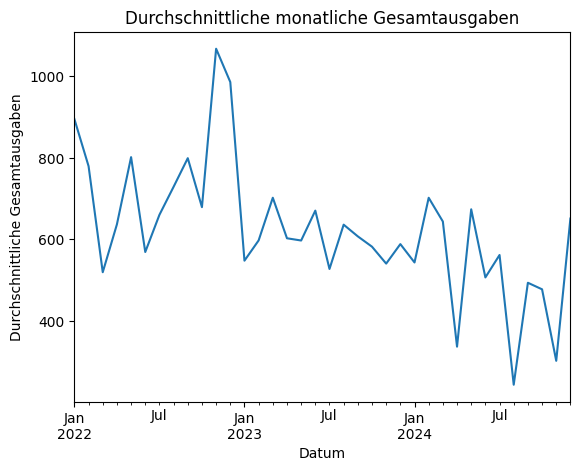

In [16]:
# Umwandlung des Datums in datetime, falls noch nicht geschehen
df['Datum_Kunde'] = pd.to_datetime(df['Datum_Kunde'])

# Trend über Zeit
df.set_index('Datum_Kunde')['Gesamtausgaben'].resample('M').mean().plot()
plt.title('Durchschnittliche monatliche Gesamtausgaben')
plt.xlabel('Datum')
plt.ylabel('Durchschnittliche Gesamtausgaben')
plt.show()


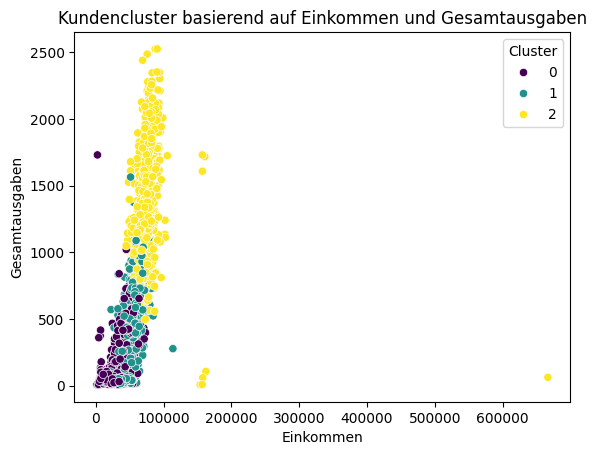

In [17]:
from sklearn.cluster import KMeans

# Auswahl der Features für das Clustering
features = df[['Alter', 'Einkommen', 'Gesamtausgaben']]

# Skalierung der Features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Anwendung von K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Hinzufügen der Cluster-Labels zum DataFrame
df['Cluster'] = clusters

# Visualisierung der Cluster
sns.scatterplot(x='Einkommen', y='Gesamtausgaben', hue='Cluster', data=df, palette='viridis')
plt.title('Kundencluster basierend auf Einkommen und Gesamtausgaben')
plt.show()



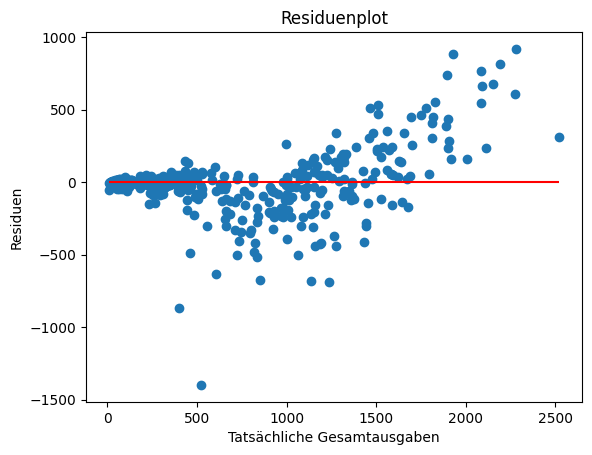

In [18]:
# Berechnung der Residuen
residuals = y_test - y_pred_rf

# Visualisierung der Residuen
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red')
plt.title('Residuenplot')
plt.xlabel('Tatsächliche Gesamtausgaben')
plt.ylabel('Residuen')
plt.show()


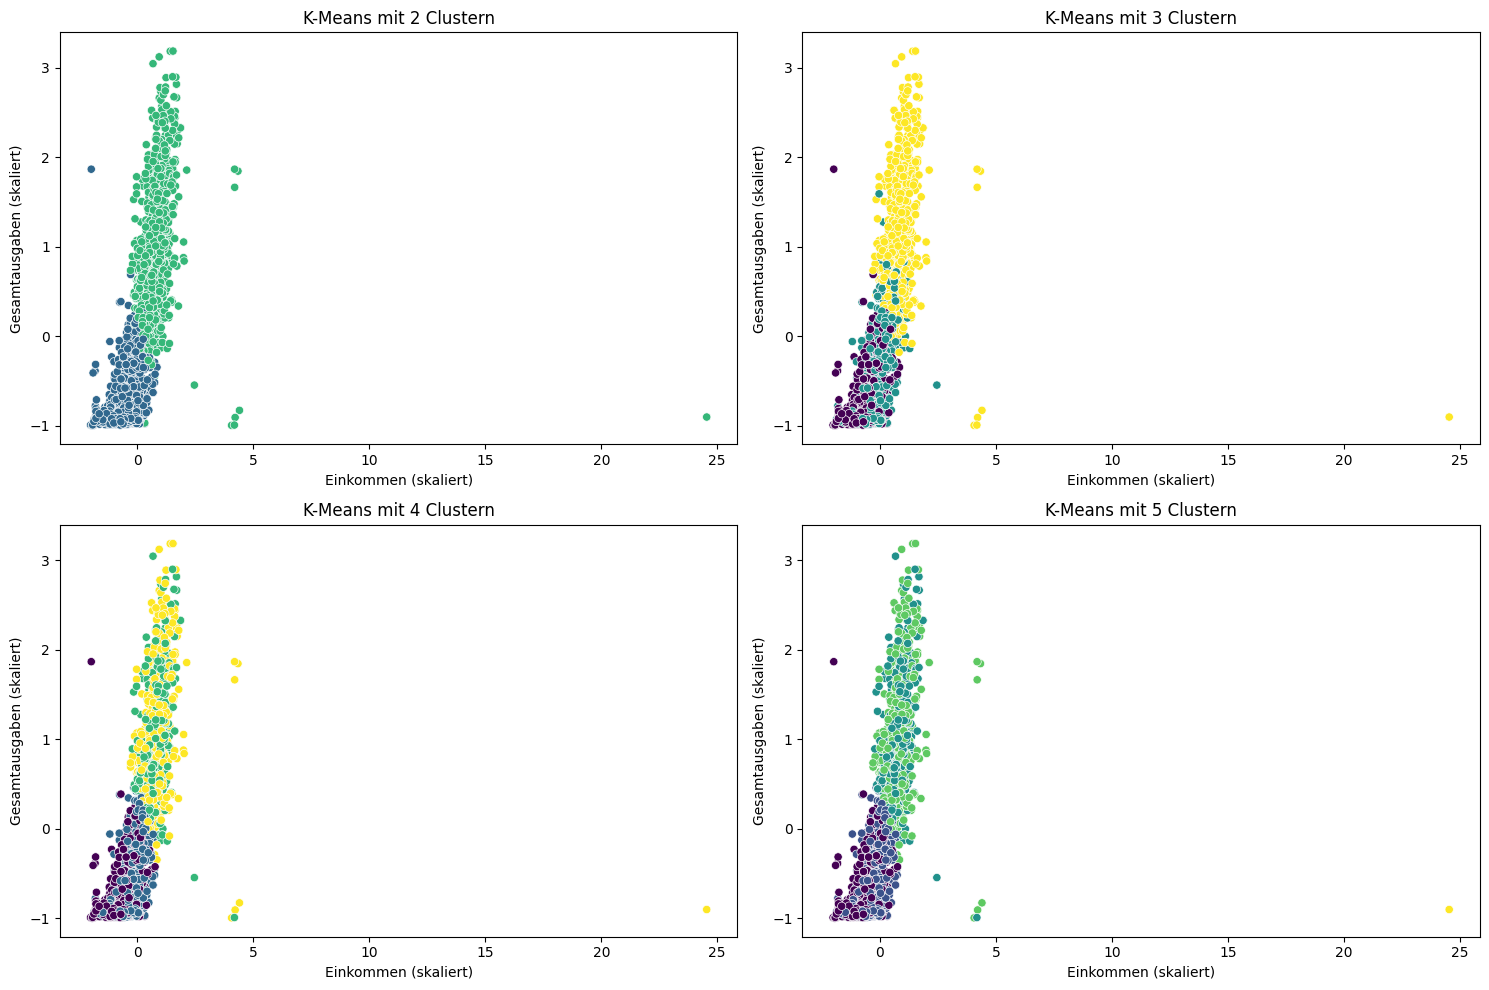

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Features auswählen und skalieren
features = df[['Alter', 'Einkommen', 'Gesamtausgaben']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Liste für verschiedene Cluster-Anzahlen
n_clusters = [2, 3, 4, 5]

plt.figure(figsize=(15, 10))

for i, k in enumerate(n_clusters, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(features_scaled)
    
    plt.subplot(2, 2, i)
    sns.scatterplot(x=features_scaled[:, 1], y=features_scaled[:, 2], hue=clusters, palette='viridis', legend=None)
    plt.title(f'K-Means mit {k} Clustern')
    plt.xlabel('Einkommen (skaliert)')
    plt.ylabel('Gesamtausgaben (skaliert)')

plt.tight_layout()
plt.show()


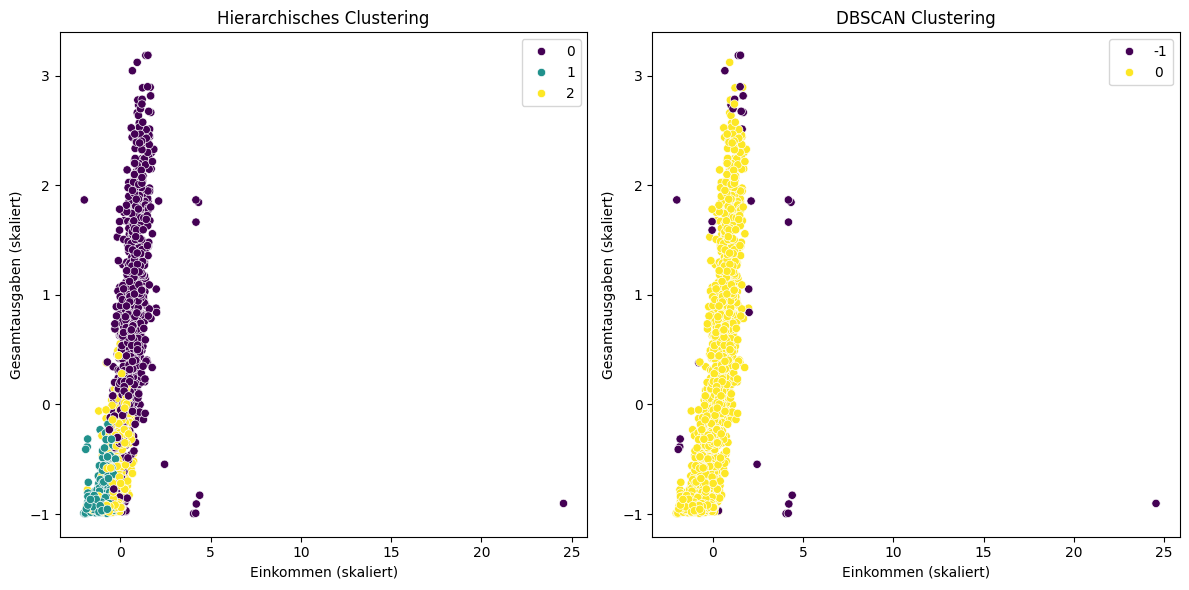

In [20]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

# Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clust.fit_predict(features_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(features_scaled)

plt.figure(figsize=(12, 6))

# Agglomerative Clustering Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=features_scaled[:, 1], y=features_scaled[:, 2], hue=agg_clusters, palette='viridis')
plt.title('Hierarchisches Clustering')
plt.xlabel('Einkommen (skaliert)')
plt.ylabel('Gesamtausgaben (skaliert)')

# DBSCAN Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=features_scaled[:, 1], y=features_scaled[:, 2], hue=dbscan_clusters, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Einkommen (skaliert)')
plt.ylabel('Gesamtausgaben (skaliert)')

plt.tight_layout()
plt.show()


Erklärte Varianz durch die ersten zwei Hauptkomponenten: 0.8888998944652913


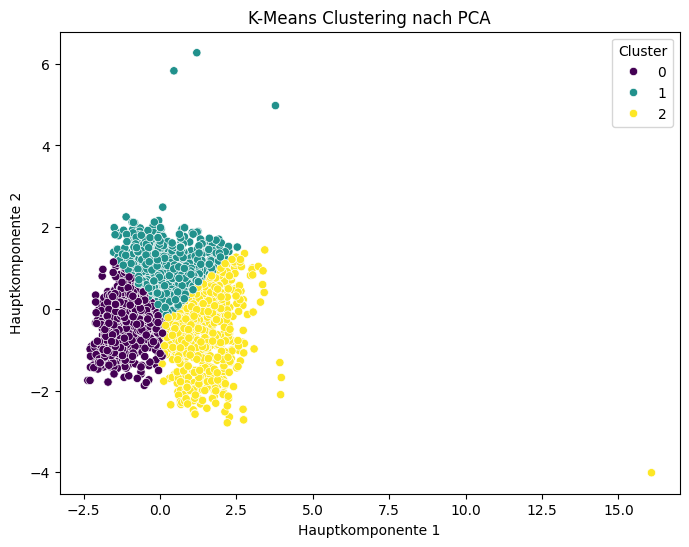

In [21]:
from sklearn.decomposition import PCA

# PCA mit 2 Komponenten
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Erklärte Varianz der Komponenten
print(f"Erklärte Varianz durch die ersten zwei Hauptkomponenten: {pca.explained_variance_ratio_.sum()}")

# Clustering auf PCA-reduzierten Daten
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(features_pca)

# Visualisierung der PCA-reduzierten und geclusterten Daten
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=clusters_pca, palette='viridis')
plt.title('K-Means Clustering nach PCA')
plt.xlabel('Hauptkomponente 1')
plt.ylabel('Hauptkomponente 2')
plt.legend(title='Cluster')
plt.show()


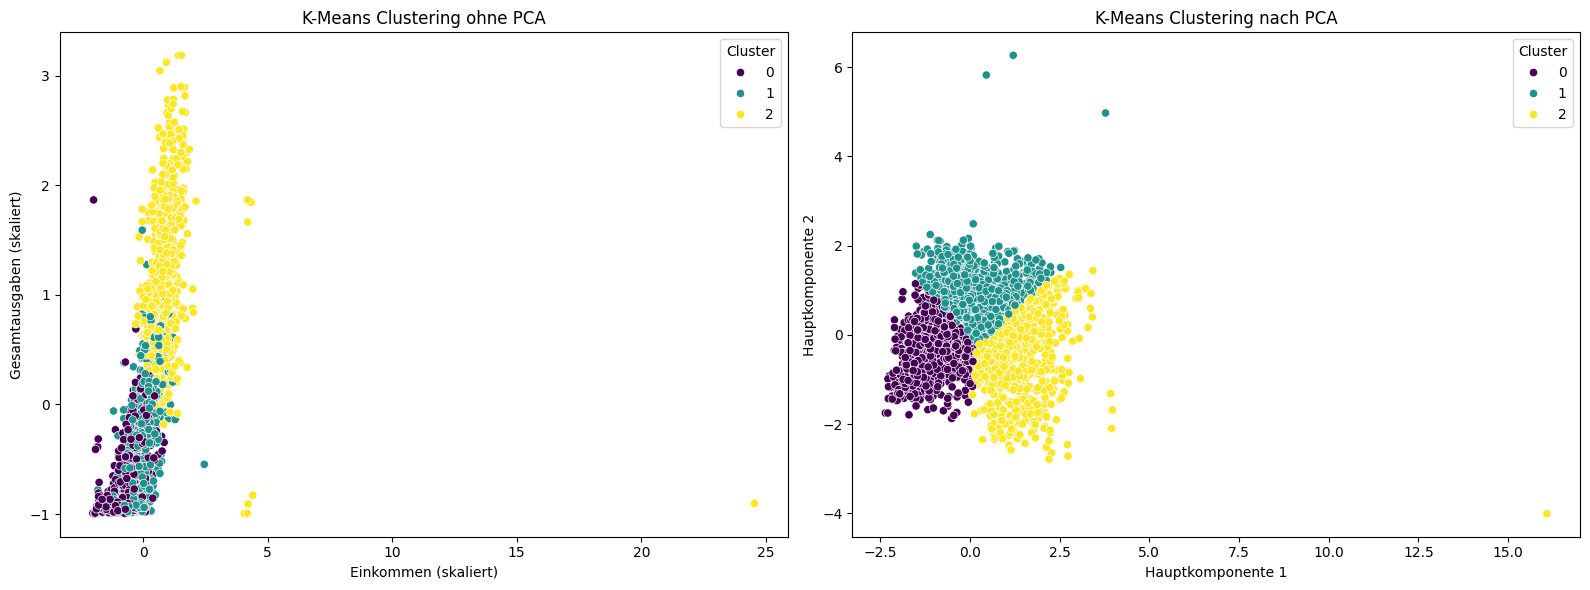

In [22]:
# Ursprüngliches Clustering ohne PCA
kmeans_original = KMeans(n_clusters=3, random_state=42)
original_clusters = kmeans_original.fit_predict(features_scaled)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=features_scaled[:, 1], y=features_scaled[:, 2], hue=original_clusters, palette='viridis')
plt.title('K-Means Clustering ohne PCA')
plt.xlabel('Einkommen (skaliert)')
plt.ylabel('Gesamtausgaben (skaliert)')
plt.legend(title='Cluster')

plt.subplot(1, 2, 2)
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=clusters_pca, palette='viridis')
plt.title('K-Means Clustering nach PCA')
plt.xlabel('Hauptkomponente 1')
plt.ylabel('Hauptkomponente 2')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()


In [23]:
# Multiple Correspondence Analysis könnte hier ein Beispiel sein
# Installation erforderlich: pip install prince
#from prince import MCA

# mca = MCA(n_components=2, n_iter=3, random_state=42)
# mca.fit(df[['Familienstand', 'Bildunsniveau']])  # Beispiel für kategoriale Daten
# mca_coordinates = mca.transform(df[['Familienstand', 'Bildunsniveau']])

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=mca_coordinates[0], y=mca_coordinates[1], hue=df['Cluster'])
# plt.title('MCA-basierte Visualisierung')
# plt.xlabel('Achse 1')
# plt.ylabel('Achse 2')
# plt.legend(title='Cluster')
# plt.show()


In [24]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

print(f"Ridge Regression R^2 Score: {r2_score(y_test, y_pred_ridge)}")


Ridge Regression R^2 Score: 0.7601389699427262


In [25]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)

# Training eines linearen Modells mit polynomialen Features
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)
y_pred_poly = model_poly.predict(poly.transform(X_test_scaled))

print(f"Polynomial Regression R^2 Score: {r2_score(y_test, y_pred_poly)}")


Polynomial Regression R^2 Score: 0.3726061500629392


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Einfaches neuronales Netzwerk
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

model_nn.compile(optimizer='adam', loss='mean_squared_error')
model_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=1)

# Vorhersage
y_pred_nn = model_nn.predict(X_test_scaled).flatten()

print(f"Neural Network R^2 Score: {r2_score(y_test, y_pred_nn)}")


C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 677487.3125
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 303574.5625
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 96212.5391
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 89727.7656
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 76122.9062
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 80959.8203
Epoch 7/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60608.7500
Epoch 8/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 69327.6953
Epoch 9/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63871.6211
Epoch 10/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63909.9805
Epoch 11/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69115.9609
Epoch 12/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63484.8164
Epoch 13/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71831.2969
Epoch 14/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 62703.8086

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest mit begrenzter Tiefe
rf_simple = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_simple.fit(X_train_scaled, y_train)
y_pred_simple = rf_simple.predict(X_test_scaled)

print(f"Vereinfachtes Random Forest R^2 Score: {r2_score(y_test, y_pred_simple)}")


Vereinfachtes Random Forest R^2 Score: 0.8555697768203305


In [28]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_model = Ridge(alpha=0.1)  # Alpha ist der Regularisierungsparameter
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

print(f"Ridge Regression R^2 Score: {r2_score(y_test, y_pred_ridge)}")


Ridge Regression R^2 Score: 0.760128001102438


In [29]:
from sklearn.model_selection import cross_val_score

# Kreuzvalidierung für das Modell
scores = cross_val_score(rf_simple, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Kreuzvalidierungsergebnisse: {scores}")
print(f"Durchschnittlicher R^2 Score aus CV: {scores.mean()}")


Kreuzvalidierungsergebnisse: [0.84512189 0.84425557 0.85893873 0.86886461 0.84292461]
Durchschnittlicher R^2 Score aus CV: 0.8520210815350154


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

# Gradient Boosting mit frühzeitigem Stoppen
gb = GradientBoostingRegressor(n_estimators=200, validation_fraction=0.2,
                               n_iter_no_change=5, tol=0.01, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

print(f"Gradient Boosting R^2 Score: {r2_score(y_test, y_pred_gb)}")
print(f"Modell stoppte nach {gb.n_estimators_} Bäumen")


Gradient Boosting R^2 Score: 0.8633619216447019
Modell stoppte nach 53 Bäumen


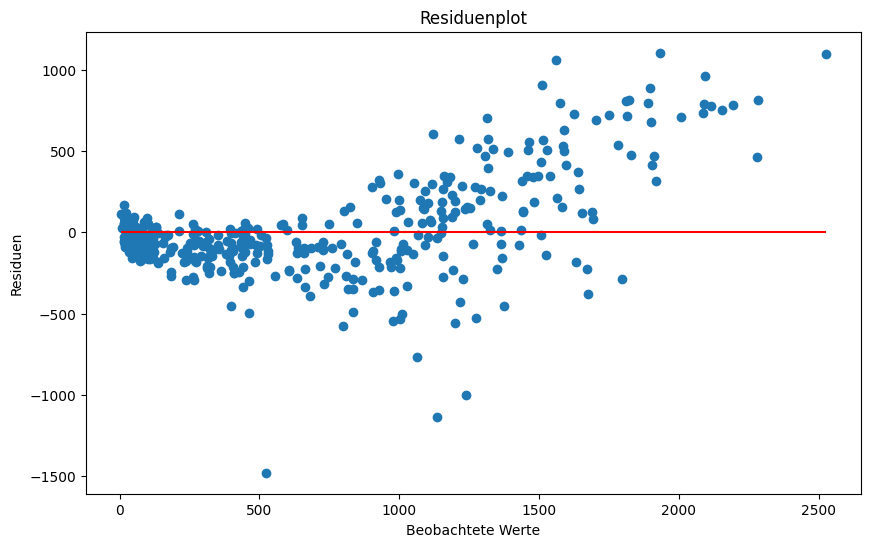

In [31]:
import matplotlib.pyplot as plt

# Berechnung der Residuen
residuen = y_test - y_pred

# Visualisierung der Residuen
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuen)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='red')
plt.xlabel('Beobachtete Werte')
plt.ylabel('Residuen')
plt.title('Residuenplot')
plt.show()
